In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV, treating "?" as NaN for column "race"
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = {"race": ["?"]})

In [40]:
print(df.shape)
print(df.index)

(101766, 50)
RangeIndex(start=0, stop=101766, step=1)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [42]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [43]:
pd.set_option('display.max_columns', None) # To display all columns in this Dataframe
df.head()

print(df['encounter_id'].is_unique)

df = df.set_index('encounter_id') # Set 'encounter_id' column of the DataFrame as index

print(df['race'].unique())
print(df['gender'].unique())

df.dropna(how = 'any', subset=['race'], inplace=True) # Drop rows where any value in column 'race' is nan

True
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
['Female' 'Male' 'Unknown/Invalid']


In [44]:
# Group by race
df.groupby(['race'])['num_medications'].median().sort_values(ascending=False)

,num_medications
race,
Caucasian,15.0
AfricanAmerican,14.0
Other,14.0
Hispanic,13.0
Asian,12.0


In [45]:
# Group by gender
df.groupby(['gender'])['num_medications'].median().sort_values(ascending=False)

,num_medications
gender,
Unknown/Invalid,22.0
Female,15.0
Male,14.0


In [46]:
df.groupby(['gender'])['gender'].count().sort_values(ascending=False)

,gender
gender,
Female,53575
Male,45917
Unknown/Invalid,1


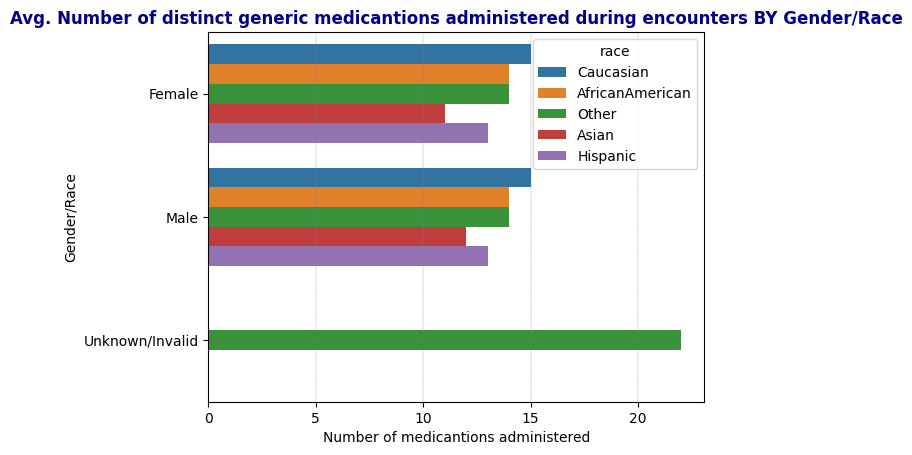

In [47]:
# Visualization
ax = sns.barplot(data = df, x = 'num_medications', y = 'gender', hue = 'race', estimator='median', errorbar=None, orient="y")
plt.title('Avg. Number of distinct generic medicantions administered during encounters BY Gender/Race', fontweight='bold', color='darkblue', loc='center')
ax.set_xlabel('Number of medicantions administered')
ax.set_ylabel('Gender/Race')
ax.xaxis.grid(True, linestyle='--', linewidth=0.3, color='gray') # Customized grid appearance

In [48]:
# A Brief conclusion statements:
# 1. Number of Female encounters are greater than that of Male encunters.
# 2. Caucasian males and females had the hightest average of Number of distinct generic medicantions administered during encounters.
# 3. Asian males and females had the lowest average of Number of distinct generic medicantions administered during encounters.